In [8]:
import pandas as pd
# Load the dataset
file_path = './data.csv'
# Attempt to load the dataset with a different encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')
# Display the first few rows of the dataset
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##### Let's perform some exploratory data analysis (EDA) to understand the dataset better.

###### Missing Data Analysis
###### Descriptive Statistics
###### Distribution of Ratings
###### Relationship between Duration and Rating
###### Genre Analysis

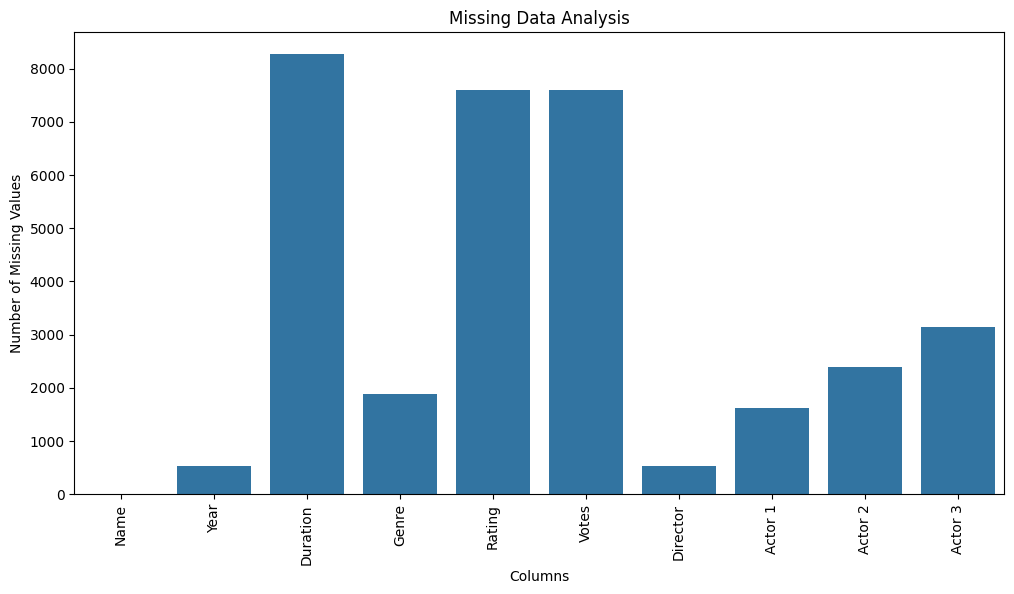

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing data
missing_data = data.isnull().sum()

# Plot missing data
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title('Missing Data Analysis')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

missing_data


In [10]:
missing_data.sum()

33523

In [11]:
data.shape

(15509, 10)

In [12]:
# Descriptive statistics
data.describe(include='all')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [13]:
genre = data['Genre']
genre.head(11)

0                         Drama
1                         Drama
2                Drama, Musical
3               Comedy, Romance
4                         Drama
5        Comedy, Drama, Musical
6           Drama, Romance, War
7                   Documentary
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
Name: Genre, dtype: object

In [14]:
genres = data['Genre'].str.split(', ', expand=True)
genres.head(11)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
7,Documentary,None,None
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18512\2207367139.py:7: SyntaxWarning: invalid escape sequence '\d'
  data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)


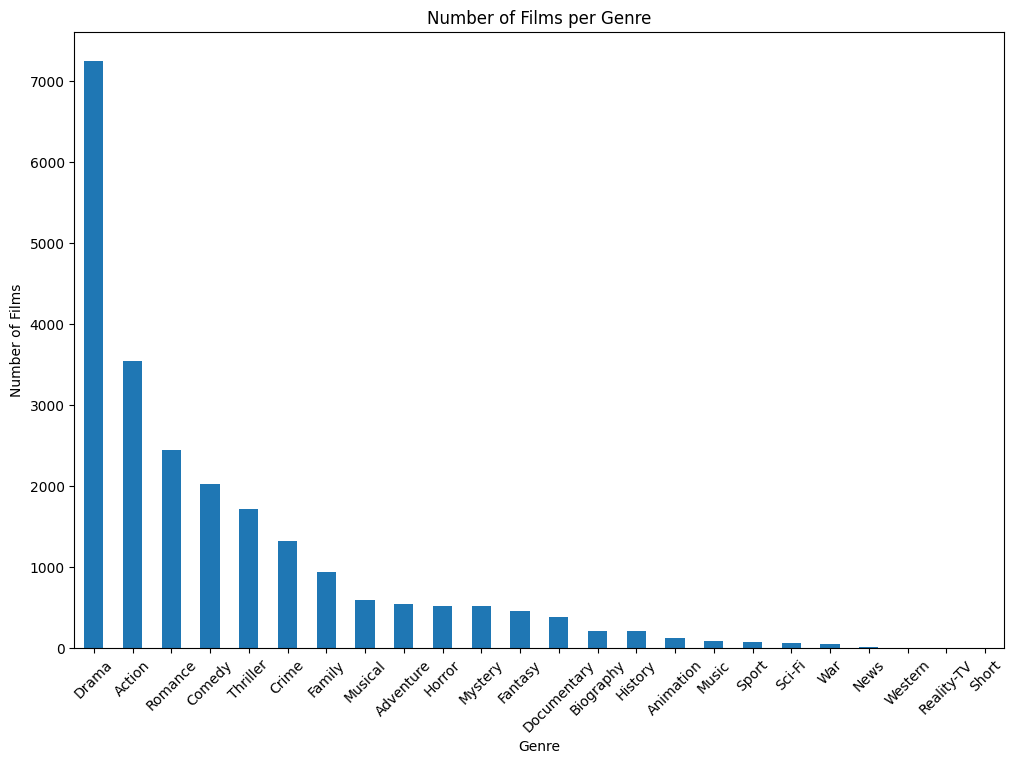

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Split the Genre column
genres_split = data['Genre'].str.get_dummies(sep=', ')

# Combine the original dataframe with the genres_split dataframe
data = pd.concat([data, genres_split], axis=1)

# Number of Films per Genre
genre_counts = genres_split.sum().sort_values(ascending=False)

# Plotting Number of Films per Genre
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Number of Films per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()




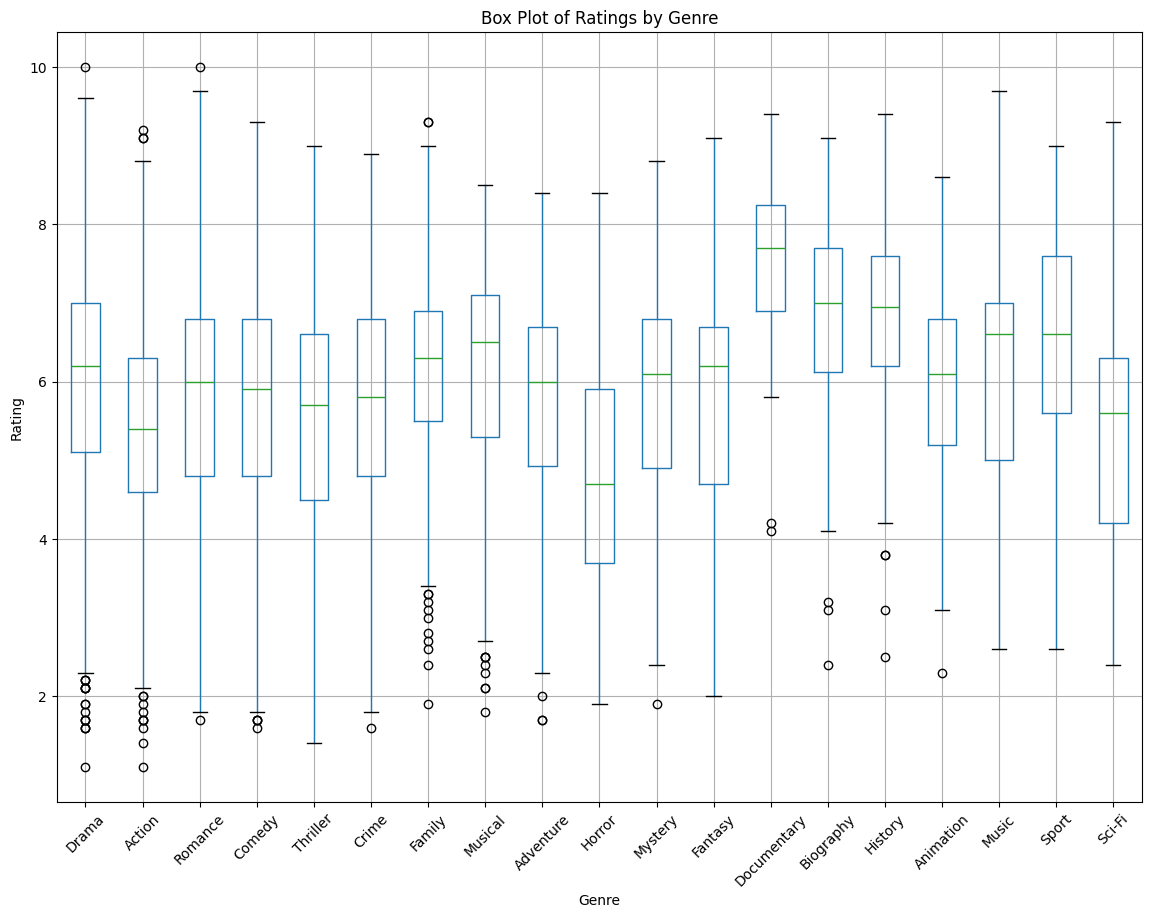

In [16]:
# Filter the data to include only rows with non-null ratings
data_with_ratings = data.dropna(subset=['Rating'])

# Filter genres with a substantial number of films (e.g., more than 50)
substantial_genres = genre_counts[genre_counts > 50].index

# Create box plots for the distribution of ratings for each substantial genre
plt.figure(figsize=(14, 10))
data_with_ratings[substantial_genres].apply(lambda x: data_with_ratings['Rating'][x == 1]).boxplot()
plt.title('Box Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

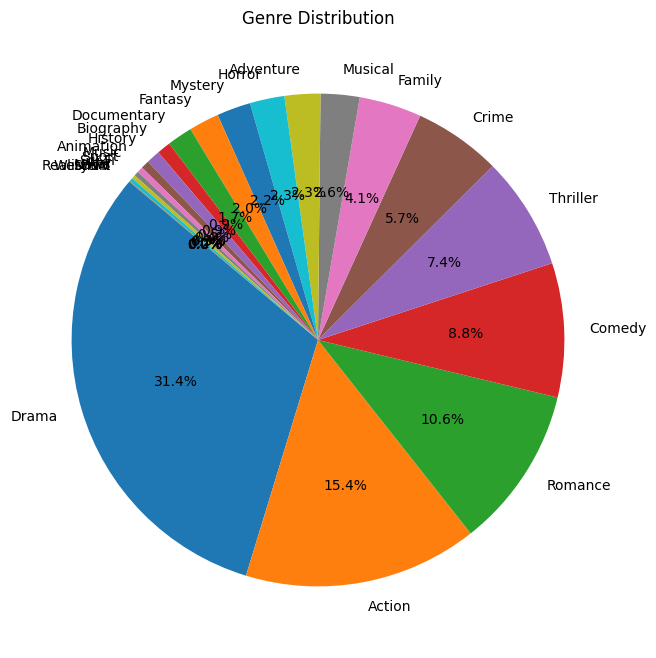

In [17]:
# Plotting Pie Chart for Genre Distribution
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.ylabel('')
plt.show()

In [18]:
directors = data["Director"].value_counts()
directors.head(11)

Director
Jayant Desai            58
Kanti Shah              57
Babubhai Mistry         50
Mahesh Bhatt            48
Master Bhagwan          47
Nanabhai Bhatt          46
Dhirubhai Desai         46
B.R. Ishara             44
David Dhawan            44
Mohammed Hussain        44
Hrishikesh Mukherjee    42
Name: count, dtype: int64

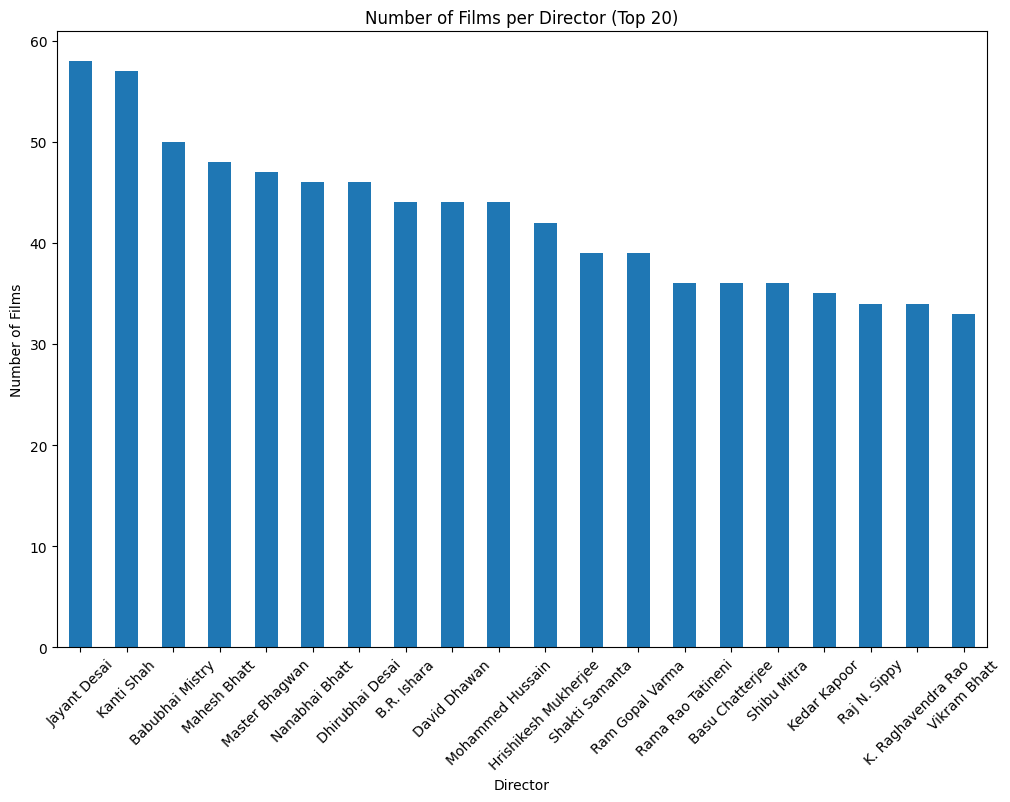

In [19]:
# Analysis for Directors

# Number of Films per Director
director_counts = data['Director'].value_counts().sort_values(ascending=False)

# Plotting Number of Films per Director
plt.figure(figsize=(12, 8))
director_counts.head(20).plot(kind='bar')
plt.title('Number of Films per Director (Top 20)')
plt.xlabel('Director')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x1000 with 0 Axes>

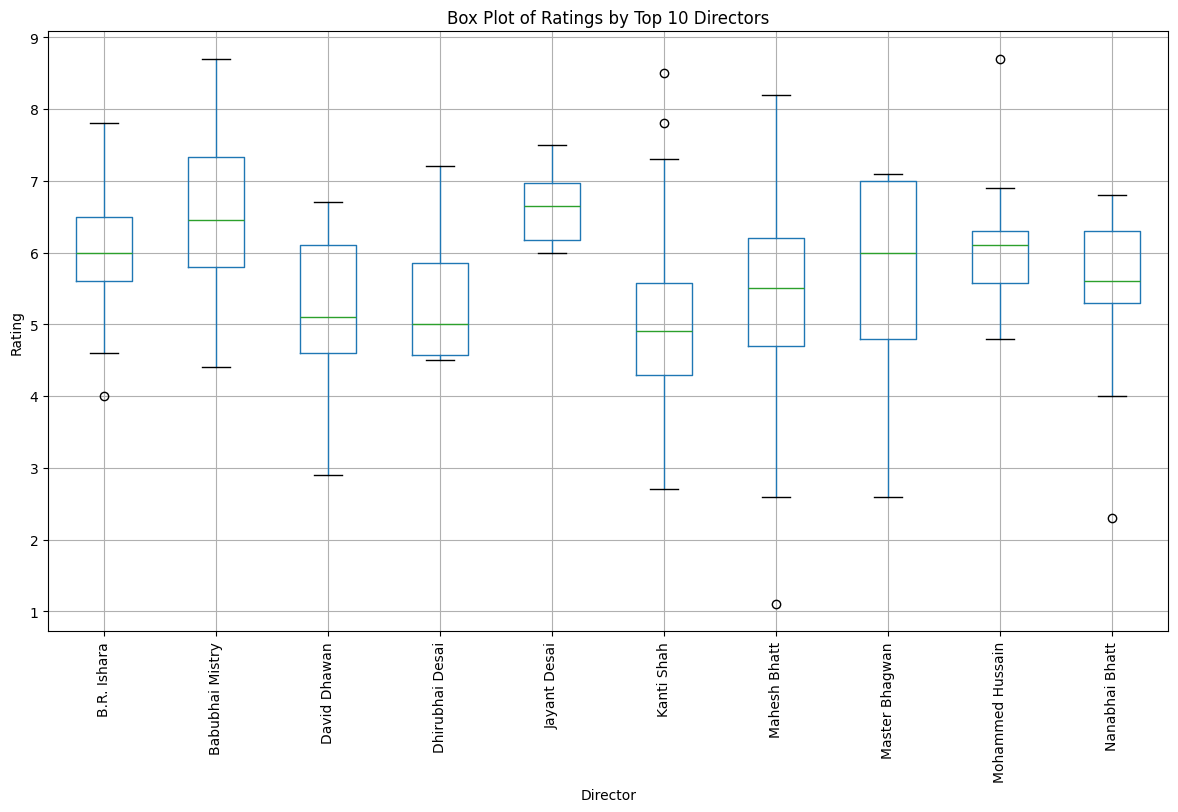

In [20]:
# Create box plots for the distribution of ratings for top 10 directors
top_directors = director_counts.head(10).index

plt.figure(figsize=(14, 10))
data_with_ratings[data_with_ratings['Director'].isin(top_directors)].boxplot(by='Director', column=['Rating'], rot=90, figsize=(14, 8))
plt.title('Box Plot of Ratings by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

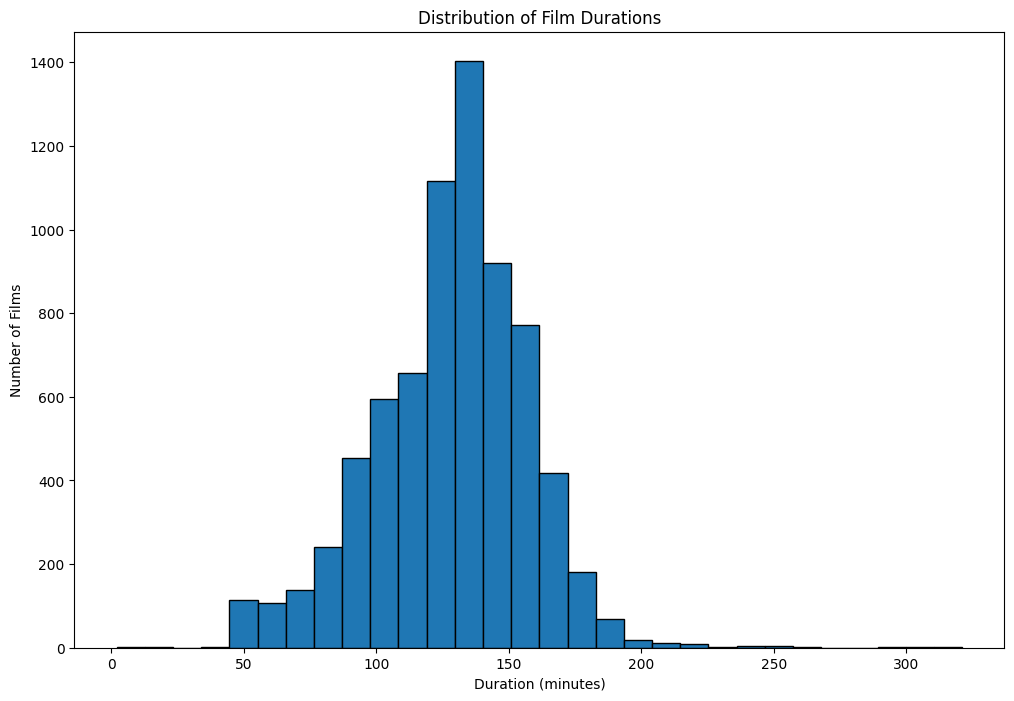

In [21]:
# Define duration categories
bins = [0, 90, 120, float('inf')]
labels = ['Short (<90 min)', 'Medium (90-120 min)', 'Long (>120 min)']
data['Duration Category'] = pd.cut(data['Duration'], bins=bins, labels=labels, right=False)

# Histogram of Film Durations
plt.figure(figsize=(12, 8))
data['Duration'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Film Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Films')
plt.show()

In [22]:
# Ensure the 'Duration Category' column is included in data_with_ratings
data_with_ratings['Duration Category'] = pd.cut(data_with_ratings['Duration'], bins=bins, labels=labels, right=False)


C:\Users\DELL\AppData\Local\Temp\ipykernel_18512\3237624346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_ratings['Duration Category'] = pd.cut(data_with_ratings['Duration'], bins=bins, labels=labels, right=False)


<Figure size 1200x800 with 0 Axes>

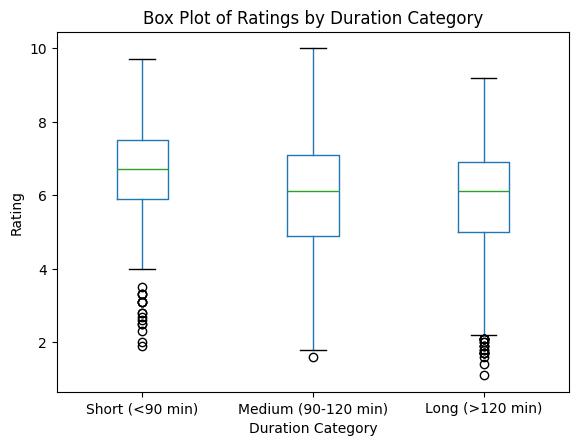

In [23]:
# 2. Box Plot of Ratings by Duration Category
plt.figure(figsize=(12, 8))
data_with_ratings.boxplot(by='Duration Category', column=['Rating'], grid=False)
plt.title('Box Plot of Ratings by Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Rating')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

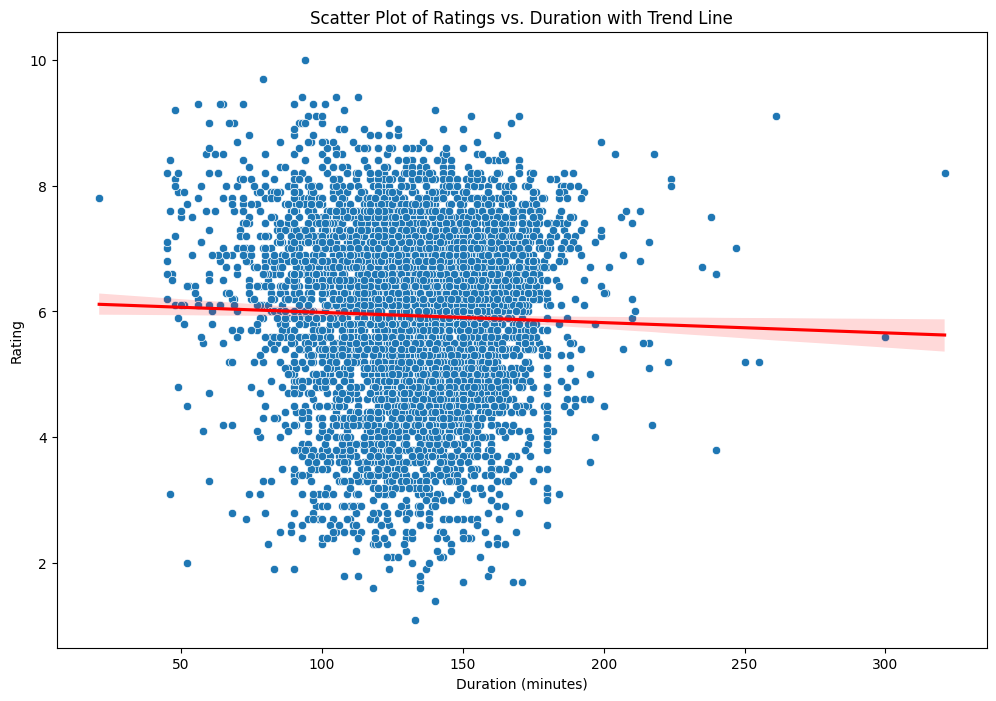

In [24]:
# 1. Scatter Plot with Trend Line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration', y='Rating', data=data_with_ratings)
sns.regplot(x='Duration', y='Rating', data=data_with_ratings, scatter=False, color='red')
plt.title('Scatter Plot of Ratings vs. Duration with Trend Line')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

In [25]:
# Combine Actor columns into a single series
all_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])

# Count the number of films per actor
actor_counts = all_actors.value_counts().sort_values(ascending=False)

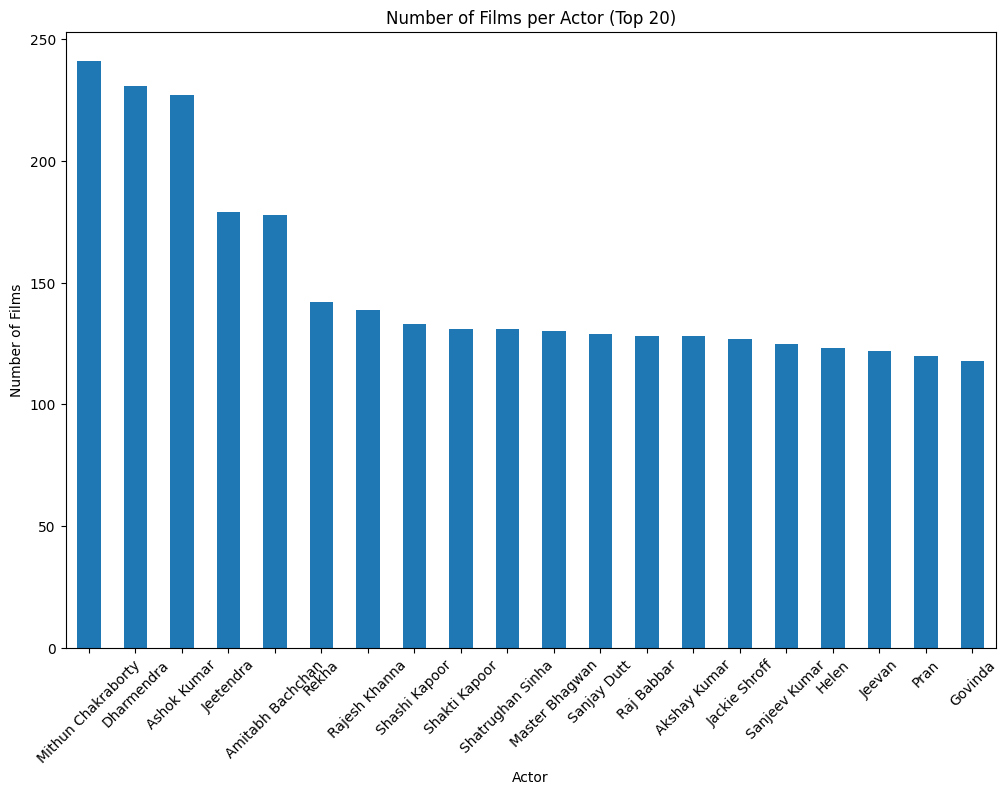

In [26]:
# Plot the number of films per actor (top 20)
plt.figure(figsize=(12, 8))
actor_counts.head(20).plot(kind='bar')
plt.title('Number of Films per Actor (Top 20)')
plt.xlabel('Actor')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x1000 with 0 Axes>

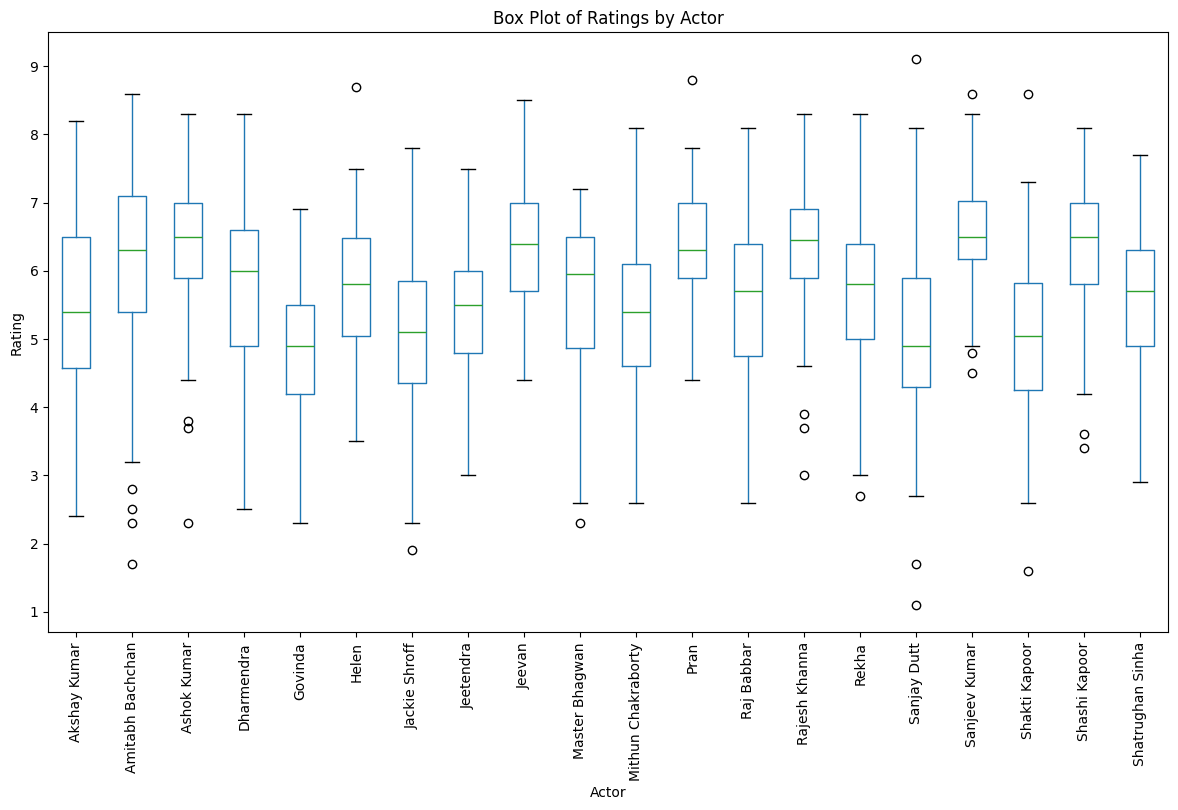

In [27]:
# Filter actors with substantial number of films for box plot (e.g., more than 5 films)//top20
substantial_actors = actor_counts[actor_counts > 5].head(20).index

# Create a dataframe with ratings and actors
ratings_and_actors = data_with_ratings.melt(id_vars=['Rating'], value_vars=['Actor 1', 'Actor 2', 'Actor 3'], 
                                            var_name='Actor Role', value_name='Actor')

# Filter the dataframe to include only substantial actors
ratings_and_actors = ratings_and_actors[ratings_and_actors['Actor'].isin(substantial_actors)]

# Create box plots for the distribution of ratings for each substantial actor
plt.figure(figsize=(14, 10))
ratings_and_actors.boxplot(by='Actor', column=['Rating'], grid=False, rot=90, figsize=(14, 8))
plt.title('Box Plot of Ratings by Actor')
plt.xlabel('Actor')
plt.ylabel('Rating')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_18512\1294826896.py:25: SyntaxWarning: invalid escape sequence '\d'
  data_selectedA['Votes'] = data_selectedA['Votes'].str.replace('[^\d.]', '', regex=True)


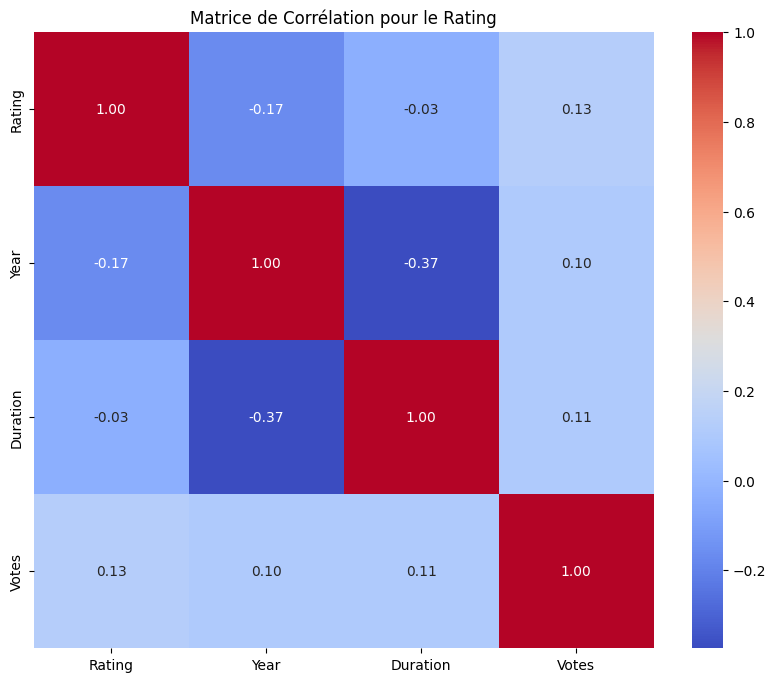

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV avec encodage latin1
data_path = './data.csv'  # Assurez-vous que le chemin est correct
dataA = pd.read_csv(data_path, encoding='latin1')

# Sélectionner les colonnes pertinentes
columns_of_interest = ['Rating', 'Year', 'Duration', 'Votes']
data_selectedA = dataA[columns_of_interest].copy()

# Convertir les colonnes en chaînes de caractères si nécessaire
data_selectedA['Duration'] = data_selectedA['Duration'].astype(str)
data_selectedA['Year'] = data_selectedA['Year'].astype(str)
data_selectedA['Votes'] = data_selectedA['Votes'].astype(str)

# Nettoyer et convertir la colonne 'Duration' en minutes
data_selectedA['Duration'] = data_selectedA['Duration'].str.replace(' min', '').astype(float)

# Nettoyer et convertir la colonne 'Year' en entier
data_selectedA['Year'] = data_selectedA['Year'].str.extract(r'(\d{4})').astype(float)

# Nettoyer et convertir la colonne 'Votes' en entier
data_selectedA['Votes'] = data_selectedA['Votes'].str.replace('[^\d.]', '', regex=True)
data_selectedA['Votes'] = data_selectedA['Votes'].replace('', '0')

# Calculer la matrice de corrélation
correlation_matrix = data_selectedA.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation pour le Rating')
plt.show()


In [37]:
actors = pd.concat([dataA['Actor 1'], data['Actor 2'], data['Actor 3']]).dropna().value_counts()
actors.head(11)

Mithun Chakraborty    241
Dharmendra            231
Ashok Kumar           227
Jeetendra             179
Amitabh Bachchan      178
Rekha                 142
Rajesh Khanna         139
Shashi Kapoor         133
Shakti Kapoor         131
Shatrughan Sinha      131
Master Bhagwan        130
Name: count, dtype: int64

l'impact de la presence d'un acteur sur rating d'un film


In [46]:
# Nettoyer les données
data_cleaned = data.dropna(subset=['Rating', 'Actor 1'])

# Calculer la moyenne des ratings pour chaque acteur
actor_impact = data_cleaned.groupby('Actor 1')['Rating'].mean().reset_index()

# Sélectionner un acteur spécifique pour visualiser l'impact
specific_actor = 'Aamir Khan'  # Exemple : Aamir Khan

# Comparer les ratings des films avec et sans cet acteur
movies_with_actor = data_cleaned[data_cleaned['Actor 1'] == specific_actor]['Rating']
movies_without_actor = data_cleaned[data_cleaned['Actor 1'] != specific_actor]['Rating']

# Calculer les ratings moyens
average_with_actor = movies_with_actor.mean()
average_without_actor = movies_without_actor.mean()



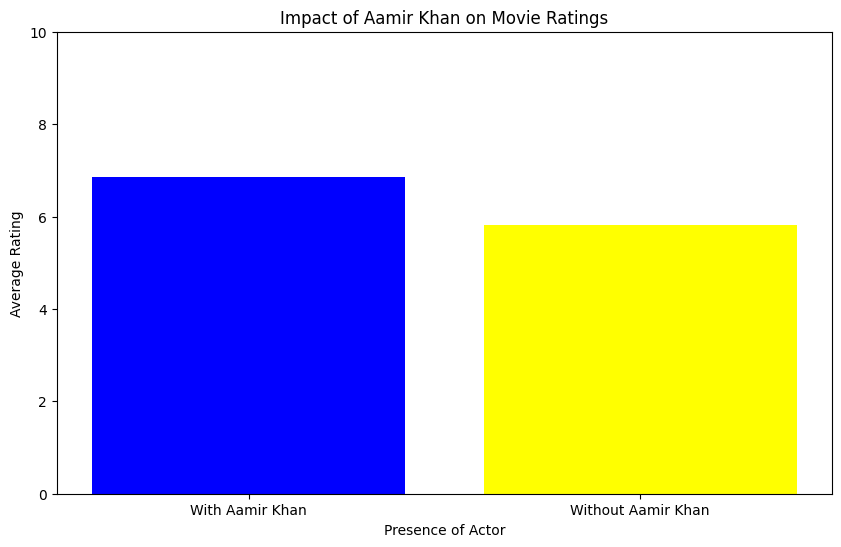

In [47]:
# Visualisation
plt.figure(figsize=(10, 6))
labels = ['With ' + specific_actor, 'Without ' + specific_actor]
values = [average_with_actor, average_without_actor]

plt.bar(labels, values, color=['blue', 'yellow'])
plt.title(f'Impact of {specific_actor} on Movie Ratings')
plt.xlabel('Presence of Actor')
plt.ylabel('Average Rating')
plt.ylim(0, 10)
plt.show()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger le fichier CSV avec encodage latin1
data_path = './data.csv'
data = pd.read_csv(data_path, encoding='latin1')

# Nettoyer les données
data_cleaned = data.dropna(subset=['Rating', 'Year', 'Duration', 'Votes'])

# Préparer les caractéristiques (features)
features = data_cleaned[['Year', 'Duration', 'Votes']].copy()

# Convertir les votes en numérique et remplacer les valeurs manquantes par 0
features['Votes'] = features['Votes'].str.replace(',', '').astype(float).fillna(0)

# Convertir les années et les durées en numérique
features['Year'] = pd.to_numeric(features['Year'], errors='coerce').fillna(0)
features['Duration'] = pd.to_numeric(features['Duration'], errors='coerce').fillna(0)

# Préparer la variable cible (target)
target = data_cleaned['Rating']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Choisir et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse}')
print(f'Coefficient de détermination (R^2) : {r2}')


Erreur quadratique moyenne (MSE) : 1.8798334179814098
Coefficient de détermination (R^2) : -0.010382582791072847


random forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Choisir et entraîner le modèle
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Faire des prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluer le modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Erreur quadratique moyenne (MSE) : {mse_rf}')
print(f'Random Forest - Coefficient de détermination (R^2) : {r2_rf}')


Random Forest - Erreur quadratique moyenne (MSE) : 2.3111751650361247
Random Forest - Coefficient de détermination (R^2) : -0.2422223747034573


Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Choisir et entraîner le modèle
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Faire des prédictions
y_pred_dt = model_dt.predict(X_test)

# Évaluer le modèle
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - Erreur quadratique moyenne (MSE) : {mse_dt}')
print(f'Decision Tree - Coefficient de détermination (R^2) : {r2_dt}')


Decision Tree - Erreur quadratique moyenne (MSE) : 2.6573427189457064
Decision Tree - Coefficient de détermination (R^2) : -0.4282823009990595


K Nearest Neighbors Regressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

# Choisir et entraîner le modèle
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

# Faire des prédictions
y_pred_knn = model_knn.predict(X_test)

# Évaluer le modèle
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'K Nearest Neighbors - Erreur quadratique moyenne (MSE) : {mse_knn}')
print(f'K Nearest Neighbors - Coefficient de détermination (R^2) : {r2_knn}')


K Nearest Neighbors - Erreur quadratique moyenne (MSE) : 2.0919272416737833
K Nearest Neighbors - Coefficient de détermination (R^2) : -0.12437986751135877
